In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import funcionesTFG as f
import importlib
importlib.reload(f)
from scipy.optimize import fsolve
import pysindy as ps
from pysindy.optimizers import trapping_sr3
from scipy.integrate import odeint
from scipy.interpolate import pade
from numpy.polynomial.chebyshev import chebfit
from numpy.polynomial.chebyshev import chebval
from scipy.optimize import curve_fit



[1.65258655]
a =  2.9526317017587735 , b =  6.112686835874201e-06 , c =  0.004094447628220032 , d =  2.4633833052828615 , m =  4.926766610565723


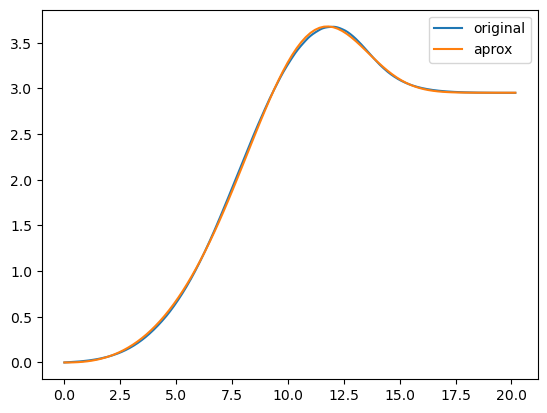

In [3]:

def fb(x, a,b,c,d,e):
    y = a * (1 - np.exp(-b * x ** c) + d * x ** e * np.exp(-b*x**c))     
    return y
def gb(x, a,b,c,d):
    e=c/2
    y = a * (1 - np.exp(-b * x ** c) + d * x ** e * np.exp(-b*x**c))     
    return y




filename="/home/carlosfdhl/work/hugoniot/prueba1"
data=f.leer_hugoniot(filename)
#print(data)
namex = "P (GPa)"
namey = "R (kg/m3)"


x=data[namex].to_numpy(dtype=float)
y=data[namey].to_numpy(dtype=float)

x = x[1:]
y = y[1:]
y0=y[0]
x0 = x[0]

y=y/y[0]-1 
x=np.log(x/x0)
#
# Valores máximos
max_idx_y = np.argmax(y)
ym = y[max_idx_y]
xm = x[max_idx_y]


gamma = 5/3
a = (gamma+1)/(gamma-1)*2.7*10**(3)/y0-1

def func(alpha):
    z0 = (1 + np.sqrt(1 + 2 * alpha ** 2)) / (2 * alpha)
    return  (1 - alpha * z0) * np.exp(-z0 ** 2) - (a - ym) / a

sol = fsolve(func, 10)
print(sol)
sigma_y=y*0


"""params, covariance = curve_fit(fb, x, y,bounds=((a-0.00000001, 0, 4.5, 0, 2),
                                                (a, 0.01, 5.9, 0.1, 4 )),
                        absolute_sigma= True,  
                        maxfev=100000)"""
params, covariance = curve_fit(gb, x, y,bounds=((a-0.00000001, 0, 4.5, 0),
                                                (a, 0.01, 5.9, 0.1 )),
                        absolute_sigma= True,  
                        maxfev=100000)
#print(*params)
print("a = ", params[0], ", b = ",params[1],  ", c = ",params[3],  ", d = ",params[2]/2, ", m = ",params[2] )

residuals1 = y- gb(x, *params)
ss_res = np.sum(residuals1**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
#print (r_squared)

x_fit = np.linspace(min(x), max(x), 100)
y_fit = gb(x_fit,*params)
#print(y_fit)
plt.plot(x,y,label="original")
plt.plot(x_fit,y_fit, label="aprox")
plt.legend()

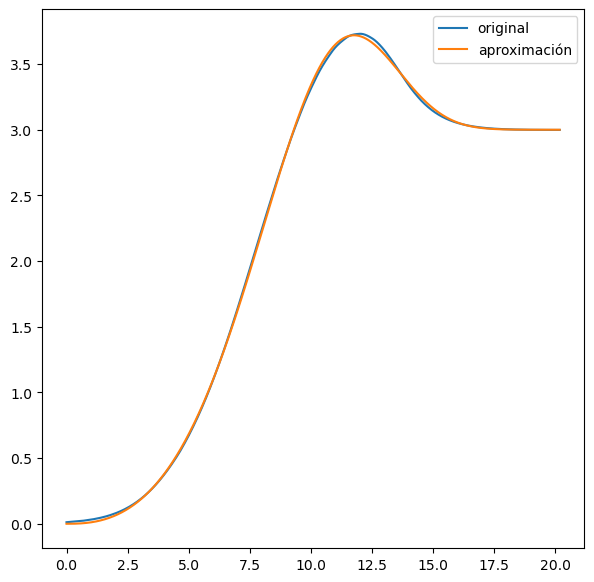

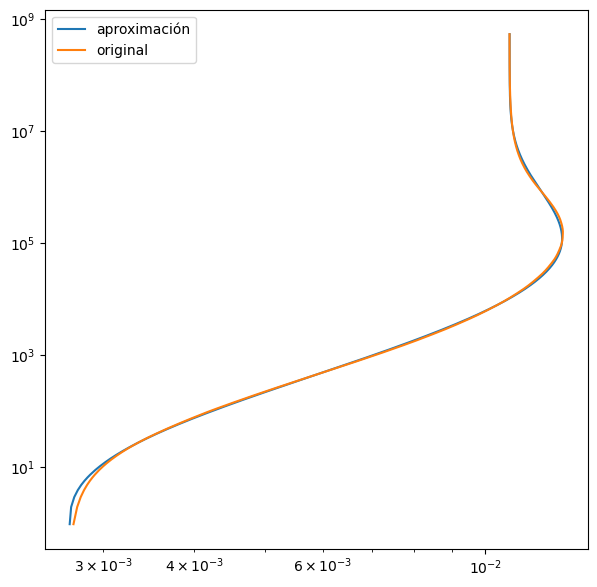

In [114]:
def h(x):
    y = 3 * (1 - np.exp(-1.2730531710857426e-05 * x ** 4.65151277169009) + 0.0036565588830940643* x ** 2.516526033192931 * np.exp(-1.2730531710857426e-05*x**4.65151277169009))     
    return y
def g(x,x0):
    x = np.log(x/x0)
    y = 2.7*10**(-3) * (3 * (1 - np.exp(-1.2730531710857426e-05 * x ** 4.65151277169009) + 0.0036565588830940643* x ** 2.516526033192931 * np.exp(-1.2730531710857426e-05*x**4.65151277169009)) +1 )  
    return y

fig1, ax1 =plt.subplots(figsize=(7,7))
fig2, ax2 =plt.subplots(figsize=(7,7))


pres=data[["P (GPa)"]].to_numpy(dtype=float)
rho=data[["R (kg/m3)"]].to_numpy(dtype=float)
pres = pres[1:]
pres0 = pres[0]
rho = rho[1:]
rho_mod = rho/rho[0]-1
pres_mod=np.log(pres/pres0)
x_fit = np.linspace(min(pres_mod), max(pres_mod), 1000)
pres_fit = np.linspace(min(pres), max(pres), 10000)
y_fit = h(x_fit)
#print(pres_fit)
y__ = g(pres,pres0)
ax1.plot(pres_mod,rho_mod, label='original')
ax1.plot(x_fit, y_fit, label='aproximación')
ax1.legend()

ax2.plot(y__,pres, label='aproximación')
ax2.plot(rho, pres, label='original')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()


<h1>Gráfico P//T vs R/R0</h1>

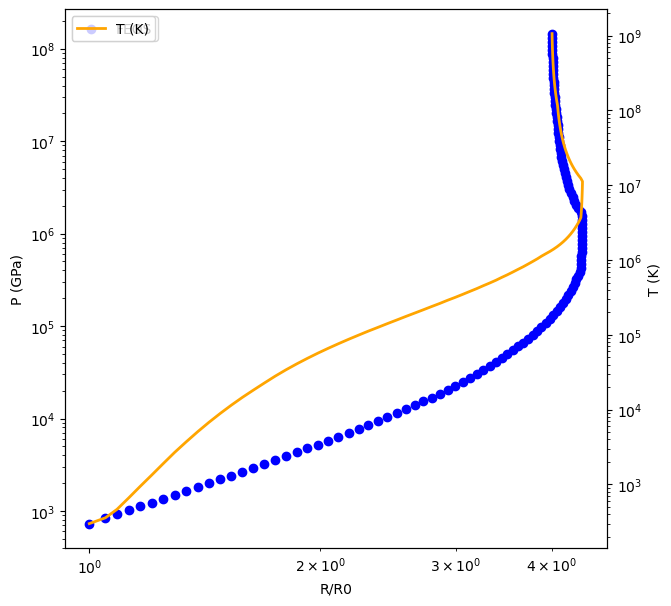

In [5]:
#Graficar Presión y Temperatura en función de Densida Relativa
x1 = f.datos_feos['R/R0'].to_numpy(dtype = float)
y2 = f.datos_feos['P (GPa)'].to_numpy(dtype = float)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()  
twin=ax.twinx()
ax.scatter(x1, y2, label = "FEOS", color = 'blue')
ax.legend()
y3 = f.datos_feos['T (K)'].to_numpy(dtype=float)

twin.plot(x1,y3, label = "T (K)", color = 'orange', linewidth = 2)
twin.legend()


twin.set_ylabel("T (K)")
twin.set_xscale('log')
twin.set_yscale('log')
ax.set_xlabel('R/R0')
ax.set_ylabel('P (GPa)')

ax.set_xscale('log')
ax.set_yscale('log')


plt.show()


Longitud: 99999 99999
(x0)' = 30.656 1 + 23.938 x0 + -152.603 x1 + 0.124 x0^2 + -19.698 x0 x1 + 114.812 x1^2
(x1)' = 5.766 1 + 13.566 x0 + -62.601 x1 + -9.951 x0 x1 + 43.834 x1^2
Error =  108.08236266234441


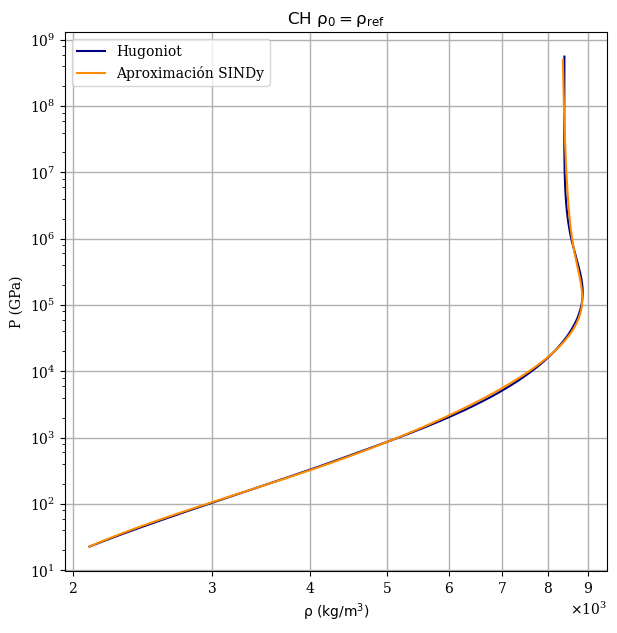

In [2]:
datos_feos = f.leer_hugoniot('/home/carlosfdhl/work/hugoniot/CH2')
#datos_feos = f.ejec_hugoniot()
#Definir posibles librerías 
plt.rcParams['font.family'] = 'serif'

fourier_library = ps.FourierLibrary(n_frequencies=2)

#parameter_lib = PolynomialLibrary(degree=1)
#polinomios3 = PolynomialLibrary(degree=4)
#polinomios2 = PolynomialLibrary(degree=2)
#polinomios1 = PolynomialLibrary(degree=1)
identidad = ps.IdentityLibrary()
trigonometricas = ps.FourierLibrary(n_frequencies=3)
#biblioteca_compuesta = ps.GeneralizedLibrary([polinomios2])

#Definir optimizadores
optimizer = trapping_sr3.TrappingSR3(threshold=0.1)
STLSQ = ps.STLSQ(threshold=0.2)
SR3 = ps.SR3(threshold=0.1, nu=1)
optimizers = [ps.STLSQ(threshold=0.1), ps.SR3(threshold=0.1, nu=1)]
#optimizer = ps.optimizers.ConstrainedSR3(nu=1e-5, threshold=1e-5)
SSR =ps.SSR()

"""
#Definir el modelo
model  =ps.SINDy(
    feature_library = biblioteca_compuesta , 
    feature_names=['x', 'y'], discrete_time = True,
    optimizer=STLSQ
    
)
"""
model =ps.SINDy()



def generar_funcion(ecuaciones):
    ecuaciones_procesadas = [eq.replace('^', '**').replace('x0', '*x[0]').replace('x1', '*x[1]').replace('1 ', '*1') for eq in ecuaciones]

    def f(x,t):
        dx = np.zeros_like(x)
        for i, eq in enumerate(ecuaciones_procesadas):
            dx[i] = eval(eq)
        return [dx[0], dx[1]]
    
    return f
    
    

#Definir datos con los que alimentar el modelo
x = datos_feos["R (kg/m3)"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)
x0=x[0]
y0 = y[0]
x1= x[1]
y1=y[1]

x=x[1:]
y=y[1:]

y_ = np.log(x/x1)
x_=np.log(y/y1)



#Entrada del modelo debe ser una matriz cuyas columnas sea cada variable
#matriz_datos = np.column_stack((x_,y_))
#matriz_datos = f.annadir_ndatos_feos(x_,y_,5)
matriz_datos = np.column_stack((x_,y_))
x0=matriz_datos[1,:]
dt = 0.002
print("Longitud:", len(y_), len(x_))
t=np.linspace(0,1,len(matriz_datos))

dt=1/(len(matriz_datos))
model.fit(matriz_datos, t=dt)

fdhl = generar_funcion(model.equations())

#Imprimir modelo
model.print()

X=odeint(fdhl,x0,t)
#plt.xscale("log")
#plt.yscale("log")
y_fit = np.exp(X[:,0])* y1
x_fit = np.exp(X[:,1])* x1
error = np.sqrt(np.mean((x - x_fit) ** 2))
print("Error = ", error)
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x,y, label='Hugoniot', color = 'navy')
ax.plot(x_fit, y_fit,label=r'Aproximación SINDy', color='darkorange')

ax.set_xlabel(r'$\mathrm{{\rho\ (kg/m^3)}}$')
ax.set_ylabel(r'P (GPa)')
plt.rcParams['text.usetex'] = False

ax.set_title(r'$\mathrm{{CH\ \rho_0= \rho_{ref}}}$')
#ax.plot(matriz_datos[1:,1],matriz_datos[1:,0])
#ax.plot(X[:,1],X[:,0], color='red')
f.config_logPlots(ax)
ax.legend()


(x0)' = 24436.008 1 + -1.805 x0
(x1)' = 146598.057 1 + -57.678 x0 + 17.460 x1


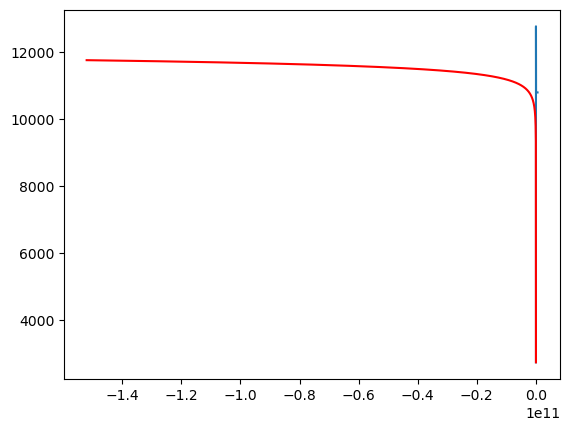

In [90]:
x = datos_feos["R (kg/m3)"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)
x0=x[0]
y0 = y[0]
x1= x[1]
y1=y[1]

#x=x[1:]
#y=y[1:]

y_ = np.log(x/x1)
x_=np.log(y/y1)
t = np.linspace(0, 1, len(x))  # Asumiendo que los datos están igualmente espaciados

dxdt = np.gradient(x_, t)  # Calcula la derivada de 'x'
dydt = np.gradient(y_, t)  # Calcula la derivada de 'y'

# Asumiendo un sistema donde x e y son dependientes
data = np.column_stack([x, y])
derivatives = np.column_stack([dxdt, dydt])

# Inicializa y ajusta el modelo SINDy
model = ps.SINDy()
model.fit(data, t=t)
model.print()

fdhl = generar_funcion(model.equations())
x0=data[1,:]

X=odeint(fdhl,x0,t)

plt.plot(data[1:,1],data[1:,0])
plt.plot(X[:,1],X[:,0], color='red')

<h1> Aproximación por Chebyshev </h1>

Coeficientes de Chebyshev:  [ 2.84134914e-02 -3.00758646e-02  1.43696802e-02 -8.43927655e-04
  1.73077061e-04 -1.52842009e-05  5.69658465e-07 -9.65038190e-09
  6.17569895e-11]
Error:  9.503652578208806


Text(0.5, 1.0, 'Aluminio')

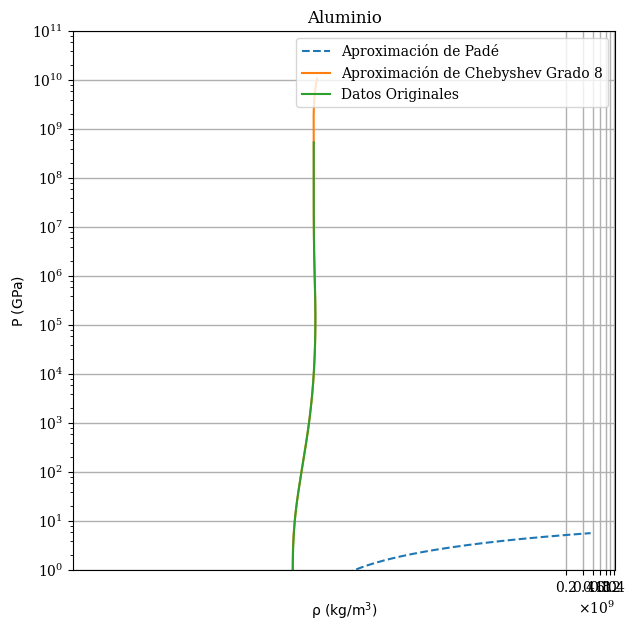

In [7]:
# Paso 1: Ajustar un polinomio a los datos
datos_feos = f.leer_hugoniot('/home/carlosfdhl/work/hugoniot/M0Al.txt')
y = datos_feos["R (kg/m3)"].to_numpy(dtype=float)
x = datos_feos["P (GPa)"].to_numpy(dtype=float)
y0=y[0]
y1=y[1]
x0=x[0]
x1=x[1]

x=x[1:]
y=y[1:]
x=np.log(x/x1)
#y = y/y1-1
y=np.log(y/y1)

grado = 8
#Ajustamos a un polinomio de Chebyshev
coeficientes = chebfit(x,y,grado)
print("Coeficientes de Chebyshev: ", coeficientes)
x_fit = np.linspace(min(x), max(x)+3,999)
y_fit2 = chebval(x_fit, coeficientes)
y_fit = chebval(x, coeficientes)

x_fit_ = np.exp(x_fit) * x1
#y_fit_ = (y_fit + 1) * y1
y_fit_ = np.exp(y_fit )*y1
y_fit2_ = (y_fit2 + 1) * y1

y_ = (y + 1) * y1
ecm=np.sqrt(np.mean((y_ - y_fit2_)**2)/len(x))
print("Error: ", ecm)
# Paso 2: Obtener una aproximación de Padé usando los coeficientes
p, q = pade(coeficientes, m=3, n=3)  

# Crear una función para evaluar la aproximación de Padé
def pade_approx(x, p, q):
    return p(x) / q(x)
def pade_(x):
    return (0.0453*x**2- 0.1314*x - 2.016) / (0.001335*x**2 + 0.04346*x + 1)
# Evaluar la aproximación de Padé en el mismo rango de x
y_pade = pade_approx(x, p, q)
y_pade = pade_(x)



# Visualizar los resultados
#plt.plot(x,y, label='Datos Originales')
x = datos_feos["P (GPa)"].to_numpy(dtype=float)
x=x[1:]
plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, y_pade, label='Aproximación de Padé', linestyle='--')

#ax.plot(y_fit_,x, '-', label=f'Aproximación de Chebyshev Grado {grado}')  
ax.plot(y_fit2_,x_fit_, '-', label=f'Aproximación de Chebyshev Grado {grado}')  

ax.plot(y_,x, label='Datos Originales')
f.config_logPlots(ax)
#ax.xscale('log')
#ax.yscale('log')
ax.set_ylim(1,10**11)
ax.legend()
ax.set_ylabel(r'$\mathrm{P\ (GPa)}$')
ax.set_xlabel(r'$\mathrm{\rho\ (kg/m^3)}$')
ax.set_title(r'Aluminio')
#ax.set_xlim(2700,7000)


In [8]:
print(x)

[0.02282058 0.02574608 0.03040239 0.03420459 0.03750592 0.04185435
 0.05340419 0.06043149 0.06684038 0.07319263 0.07956259 0.08714223
 0.09475211 0.10449181 0.11368742 0.12296498 0.13326099 0.14468507
 0.15543462 0.16752967 0.18005603 0.19244147 0.20590937 0.21974549
 0.23431939 0.24914624 0.26445296 0.28049464 0.29635078 0.31317139
 0.33063513 0.34812079 0.36655076 0.38465173 0.40303821 0.42182123
 0.44097572 0.46108808 0.48096234 0.50163597 0.52208115 0.54333777
 0.56446496 0.58571023 0.60775328 0.62969982 0.65174824 0.67354407
 0.69632029 0.71873226 0.74215055 0.76500727 0.78774077 0.81078617
 0.8336837  0.85675428 0.87933533 0.90199451 0.9241228  0.94625104
 0.96891495 0.99019415 1.01181032 1.03312187 1.05473664 1.07510569
 1.09529965 1.11548761 1.13490862 1.15422428 1.1725624  1.19109704
 1.20920819 1.22719637 1.24476162 1.26080221 1.27791324 1.29408485
 1.3088485  1.32406921 1.33821811 1.35195881 1.36577509 1.37858043
 1.39097229 1.40353197 1.41515623 1.42640054 1.43737115 1.4474

In [11]:
def f(a1,a2,b0,b1,b2,x, a0=0):
    return (a2*x**2+a1*x)/(b2*x**2+b1*x+b0)


gamma=5/3
y3=max(x)
x3=
g=np.log((gamma+1)/(gamma-1))
a1=-2*x3*(g-y3)*b2+y3*b1
a2=g*b2
b0=x3**2*(y3-g)*b2/y3

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

p=           2
0.02434 x - 0.02579 x + 0.02613 q=            2
-0.04174 x + 0.07008 x + 1


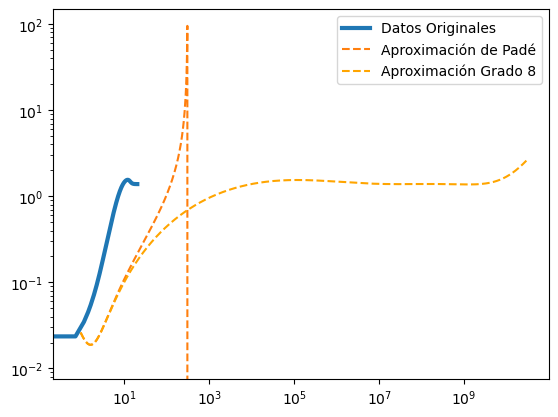

In [3]:
datos_feos = f.leer_hugoniot('/home/carlosfdhl/work/hugoniot/M0Al.txt')

def poly_chev_6(x, coeficientes):
    [a0,a1,a2,a3,a4]=coeficientes#,a5,a6]=coeficientes
    b0 = a0-a2+a4#-a6
    b1 = a1-3*a3#+5*a5
    b2 = 2*a2-8*a4#+18*a6
    b3 = 4*a3#-20*a5
    b4 = 8*a4#-48*a6
    #b5 = 16*a5
    #b6 = 32*a6
    coef_bn = [b0,b1,b2,b3,b4]#,b5,b6]
    return b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4, coef_bn #+ b5*x**5 + b6*x**6, coef_bn

def poly_chev_8(x, coeficientes):
    [a0,a1,a2,a3,a4,a5,a6,a7,a8]=coeficientes
    b0 = a0-a2+a4-a6+a8
    b1 = a1-3*a3+5*a5-7*a7
    b2 = 2*a2-8*a4+18*a6-32*a8
    b3 = 4*a3-20*a5+56*a7
    b4 = 8*a4-48*a6+160*a8
    b5 = 16*a5-112*a7
    b6 = 32*a6-256*a8
    b7 = 64*a7
    b8 = 128*a8
    coef_bn = [b0,b1,b2,b3,b4,b5,b6,b7,b8]
    return b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5 + b6*x**6+b7*x**7+b8*x**8, coef_bn


x = datos_feos["R/R0"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)
x=x[1:]
y=y[1:]
x=np.log(x)
y0=y[0]
y=np.log(y/y[0])

coeficientes6 = chebfit(y,x,4)
coeficientes8 = chebfit(y,x,8)


y_fit = np.linspace(min(y), max(y)+4, len(x))  
x_fit6, coef_bn6 = poly_chev_6(y_fit, coeficientes6)
x_fit8, coef_bn6 = poly_chev_8(y_fit, coeficientes8)
p, q = pade(coef_bn6, m=2, n=2)  
print("p= ", p, "q= ", q)

# Crear una función para evaluar la aproximación de Padé
def pade_approx(x, p, q):
    return p(x) / q(x)

x_pade = pade_approx(y_fit, p, q)
"""
x=np.exp(x)
y=np.exp(y)*y0

x_fit6=np.exp(x_fit6)
x_fit8=np.exp(x_fit8)

ecm6 = np.mean((x_fit6 - x)**2)
em6 = np.sqrt(ecm6)
ecm8 = np.mean((x_fit8 - x)**2)
em8 = np.sqrt(ecm8)
"""
y_fit=np.exp(y_fit)*y0

# Visualizar los resultados
plt.plot(y,x, label='Datos Originales', linewidth=3)

plt.plot(y_fit,x_pade, label='Aproximación de Padé', linestyle='--')
#plt.plot( y_fit,x_fit6,  '-', label=f'Aproximación Grado {4}', linestyle='--', color='red')  
plt.plot( y_fit,x_fit8,  '-', label=f'Aproximación Grado {8}', linestyle='--', color='orange')  

#plt.plot( y_fit,x_fit6,  '-', label=f'Aproximación Grado {6}, em = {em6} g/cm3', linestyle='--', color='red')  
#plt.plot( y_fit,x_fit8,  '-', label=f'Aproximación Grado {8}, em = {em8} g/cm3', linestyle='--', color='orange')  
plt.plot()

#plt.plot(y_fit,x_pade, label='Aproximación de Padé', linestyle='--')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()


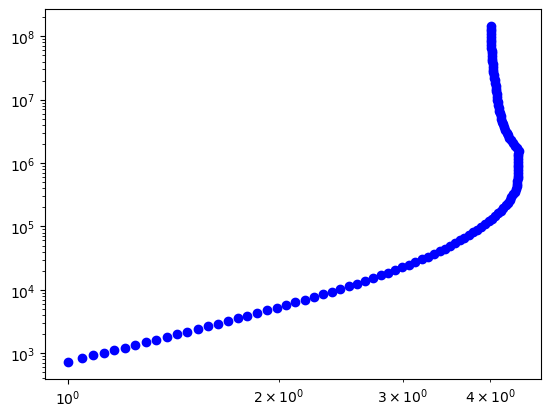

In [116]:
plt.scatter(x,y, color='blue')
plt.xscale('log')
plt.yscale('log')

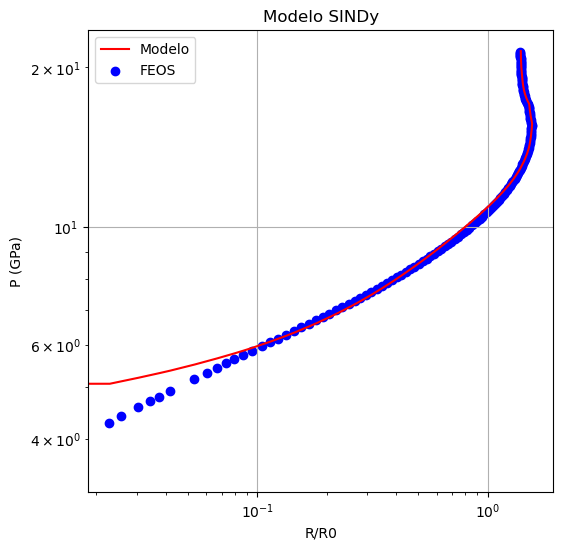

In [53]:
#Graficar resultado del modelo
x_model = model.predict(matriz_datos)
fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.plot(x_model[:,0], x_model[:,1], color = 'red' ,label = 'Modelo')
ax.scatter(x,y, color = 'blue', label = 'FEOS')
ax.set_xlabel("R/R0")
ax.set_ylabel("P (GPa)")
ax.set_title('Modelo SINDy')
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
#ax.set_ylim(4,40)

In [7]:
#Añadir datos ficticios para mejorar la aproximación
def f(y_mayor, y_menor, x_mayor, x_menor, x_new):
    m = (y_mayor - y_menor) / (x_mayor - x_menor)
    n = y_menor - m * x_menor
    return m*x_new+n

#Definir valores con los que alimentar el modelo
x = datos_feos["R/R0"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)
x0 = x[0]
y0 = y[0]
x = np.log(x/x0)
y=np.log(y/y0)

#Definir valores nuevos a añadir en los datos
x_new = np.linspace(-0.03,0,40)
y_new= []
for value in x_new:
    y_new.append(f(y[3], y[1],x[3],x[1],value))


x_new = np.array(x_new, dtype=float)
y_new = np.array(y_new, dtype=float)

#Juntar los datos nuevos con los viejos
RR0_sindy = np.concatenate((x_new, x))
P_sindy = np.concatenate((y_new, y))

#Entrada del modelo debe ser una matriz cuyas columnas sea cada variable
matriz_datos = np.column_stack((RR0_sindy,P_sindy))
model.fit(matriz_datos, t=1)

model.print()

#Aplicar el modelo calculado a los datos en matriz_datos y aplicar exponencial
def apply_model(matriz_datos, x0, y0):
    # Extraer las columnas de la matriz de datos
    x_transformed = matriz_datos[:, 0]  # RR0_sindy transformado
    y_transformed = matriz_datos[:, 1]  # P_sindy transformado
    
    # Calcular el próximo estado transformado
    x_next_transformed = 1.004 * x_transformed
    y_next_transformed = 0.564 + 1.081 * x_transformed + 0.858 * y_transformed - 1.027 * x_transformed**2 + 0.103 * x_transformed * y_transformed
    
    # Aplicar la transformación inversa para obtener el próximo estado en la escala original
    x_new = x0 * np.exp(x_next_transformed)
    y_new = y0 * np.exp(y_next_transformed)
    
    return x_new, y_new

x_new, y_new = apply_model(matriz_datos, x0, y0)

#Aplicar filtro a los datos, eliminando los valores añadidos
mask = x_new >= 1.0
x_new = x_new[mask]
y_new = y_new[mask]
x_new = x_new[1:]
y_new = y_new[1:]


(x)[k+1] = 1.004 x[k]
(y)[k+1] = 0.564 1 + 1.081 x[k] + 0.858 y[k] + -1.027 x[k]^2 + 0.103 x[k] y[k]


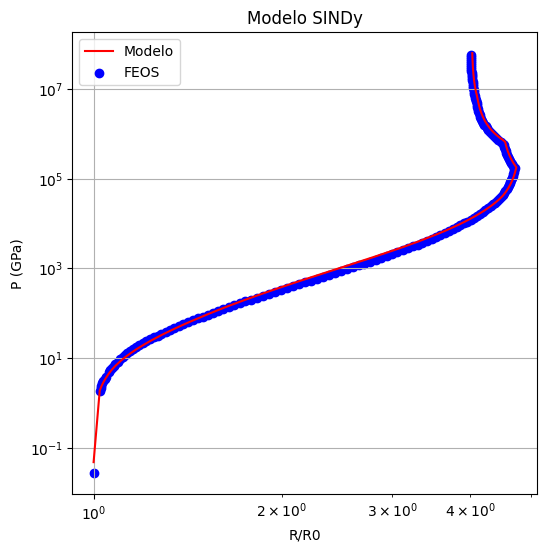

In [8]:
#Graficar el modelo
x = datos_feos["R/R0"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)

x_model = model.predict(matriz_datos)
error_cuadratico_medio = mean_squared_error(x_model, matriz_datos)

fig, ax = plt.subplots(1,1, figsize = (6,6))
#ax.plot(x_model[:,0], x_model[:,1], color = 'red' ,label = 'Modelo')
ax.plot(x_new, y_new, color = 'red' ,label = 'Modelo')
ax.scatter(x,y, color = 'blue', label = 'FEOS')
ax.set_xlabel("R/R0")
ax.set_ylabel("P (GPa)")
ax.set_title('Modelo SINDy')
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
#ax.set_ylim(4,40)

Optimización del número de puntos a añadir en el modelo

In [16]:
#Definir valores con los que alimentar el modelo
x = datos_feos["R/R0"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)
x0 = x[0]
y0 = y[0]
x = np.log(x/x0)
y=np.log(y/y0)
n = 300
ecm_min=99999999
n_opt = 0
j = 0
j_opt = 0
while j>-5: 
    for i in range(5,n):
        #Definir valores nuevos a añadir en los datos
        x_new = np.linspace(j,0,i)
        y_new= []
        for value in x_new:
            y_new.append(f(y[3], y[1],x[3],x[1],value))


        x_new = np.array(x_new, dtype=float)
        y_new = np.array(y_new, dtype=float)

        #Juntar los datos nuevos con los viejos
        RR0_sindy = np.concatenate((x_new, x))
        P_sindy = np.concatenate((y_new, y))

        #Entrada del modelo debe ser una matriz cuyas columnas sea cada variable
        matriz_datos = np.column_stack((RR0_sindy,P_sindy))
        model.fit(matriz_datos, t=1)

        #Predecir valores
        prediccion = model.predict(matriz_datos)
        
        ecm = mean_squared_error(prediccion, matriz_datos)
        if ecm_min>ecm:
            ecm_min = ecm
            n_opt = i
            j_opt = j
    j -=0.01

KeyboardInterrupt: 

In [ ]:
print(n_opt)
print(j_opt)
print(ecm_min)

299
-0.26000000000000006
0.0012753708284567696


In [17]:
#Añadir datos ficticios para mejorar la aproximación
def f(y_mayor, y_menor, x_mayor, x_menor, x_new):
    m = (y_mayor - y_menor) / (x_mayor - x_menor)
    n = y_menor - m * x_menor
    return m*x_new+n

#Definir valores con los que alimentar el modelo
x = datos_feos["R/R0"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)
x0 = x[0]
y0 = y[0]
x = np.log(x/x0)
y=np.log(y/y0)

#Definir valores nuevos a añadir en los datos
x_new = np.linspace(j_opt,0,n_opt)
y_new= []
for value in x_new:
    y_new.append(f(y[3], y[1],x[3],x[1],value))


x_new = np.array(x_new, dtype=float)
y_new = np.array(y_new, dtype=float)

#Juntar los datos nuevos con los viejos
RR0_sindy = np.concatenate((x_new, x))
P_sindy = np.concatenate((y_new, y))

#Entrada del modelo debe ser una matriz cuyas columnas sea cada variable
matriz_datos = np.column_stack((RR0_sindy,P_sindy))
model.fit(matriz_datos, t=1)
ecm = mean_squared_error(prediccion, matriz_datos)

model.print()

ValueError: Found input variables with inconsistent numbers of samples: [442, 473]

In [ ]:
print(ecm)

NameError: name 'ecm' is not defined

In [ ]:
print(matriz_datos)

[[-2.60000000e-01 -7.19525989e+00]
 [-2.59127517e-01 -7.15993006e+00]
 [-2.58255034e-01 -7.12460024e+00]
 [-2.57382550e-01 -7.08927042e+00]
 [-2.56510067e-01 -7.05394059e+00]
 [-2.55637584e-01 -7.01861077e+00]
 [-2.54765101e-01 -6.98328094e+00]
 [-2.53892617e-01 -6.94795112e+00]
 [-2.53020134e-01 -6.91262130e+00]
 [-2.52147651e-01 -6.87729147e+00]
 [-2.51275168e-01 -6.84196165e+00]
 [-2.50402685e-01 -6.80663182e+00]
 [-2.49530201e-01 -6.77130200e+00]
 [-2.48657718e-01 -6.73597218e+00]
 [-2.47785235e-01 -6.70064235e+00]
 [-2.46912752e-01 -6.66531253e+00]
 [-2.46040268e-01 -6.62998271e+00]
 [-2.45167785e-01 -6.59465288e+00]
 [-2.44295302e-01 -6.55932306e+00]
 [-2.43422819e-01 -6.52399323e+00]
 [-2.42550336e-01 -6.48866341e+00]
 [-2.41677852e-01 -6.45333359e+00]
 [-2.40805369e-01 -6.41800376e+00]
 [-2.39932886e-01 -6.38267394e+00]
 [-2.39060403e-01 -6.34734412e+00]
 [-2.38187919e-01 -6.31201429e+00]
 [-2.37315436e-01 -6.27668447e+00]
 [-2.36442953e-01 -6.24135464e+00]
 [-2.35570470e-01 -6

In [1]:
#Aplicar el modelo calculado a los datos en matriz_datos y aplicar exponencial
def apply_model(matriz_datos, x0, y0):
    # Extraer las columnas de la matriz de datos
    x_transformed = matriz_datos[:, 0]  # RR0_sindy transformado
    y_transformed = matriz_datos[:, 1]  # P_sindy transformado
    
    # Calcular el próximo estado transformado
    x_next_transformed = 1.004 * x_transformed
    y_next_transformed = -0.068 + 1.003 * y_transformed  + 0.075 * x_transformed**2
    
    # Aplicar la transformación inversa para obtener el próximo estado en la escala original
    x_new = x0 * np.exp(x_next_transformed)
    y_new = y0 * np.exp(y_next_transformed)
    
    return x_new, y_new

x_new, y_new = apply_model(matriz_datos, x0, y0)

#Aplicar filtro a los datos, eliminando los valores añadidos
mask = x_new >= 1.0
x_new = x_new[mask]
y_new = y_new[mask]
x_new = x_new[1:]
y_new = y_new[1:]

#Graficar el modelo
x = datos_feos["R/R0"].to_numpy(dtype=float)
y = datos_feos["P (GPa)"].to_numpy(dtype=float)

x_model = model.predict(matriz_datos)
error_cuadratico_medio = mean_squared_error(x_model, matriz_datos)
print(error_cuadratico_medio)

fig, ax = plt.subplots(1,1, figsize = (6,6))
#ax.plot(x_model[:,0], x_model[:,1], color = 'red' ,label = 'Modelo')
ax.plot(x_new, y_new, color = 'red' ,label = 'Modelo')
ax.scatter(x,y, color = 'blue', label = 'FEOS')
ax.set_xlabel("R/R0")
ax.set_ylabel("P (GPa)")
ax.set_title('Modelo SINDy')
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

NameError: name 'matriz_datos' is not defined